Importing library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset=pd.read_csv('/content/delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA

Here both the delivery time and sorting time are in same range so we dont have to use Feature scaling as they are in the same scale

In [ ]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Here we can Infer from the info screen that there is no missing values in the dataset

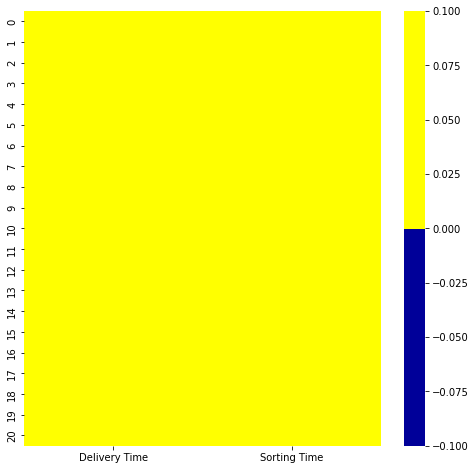

In [ ]:
#We visualization to find missing data set if exist
cols=dataset.columns
color=['#000099','#ffff00']
fig=plt.figure(figsize=(8,8))
sns.heatmap(dataset[cols].isnull(),cmap=sns.color_palette(color))

Here we can infer that there is 0 missing value present as there is no blue line in the heatmap

To find outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


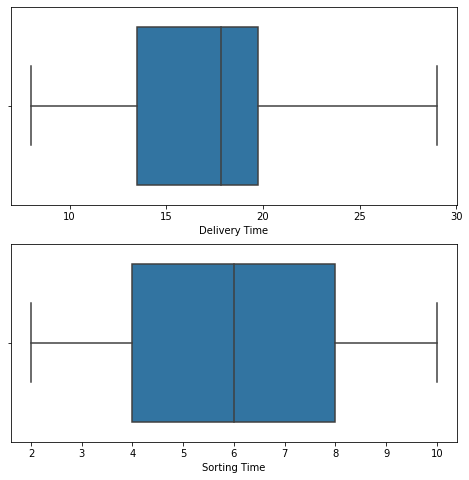

In [ ]:
fig=plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(dataset['Delivery Time'])
plt.subplot(2,1,2)
sns.boxplot(dataset['Sorting Time'])

Here From the above box plot we can infer that the data set does not cointain any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


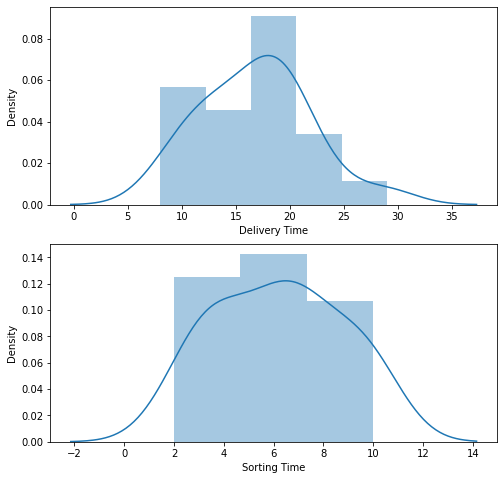

In [ ]:
#histogram 
fig=plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(dataset['Delivery Time'])
plt.subplot(2,1,2)
sns.distplot(dataset['Sorting Time'])

In [ ]:
#Checking for duplicate values in the columns which can reduce the efficiency of the model
dataset[dataset.duplicated()].sum()

Delivery Time    0.0
Sorting Time     0.0
dtype: float64

There are no duplicate values present in the data set

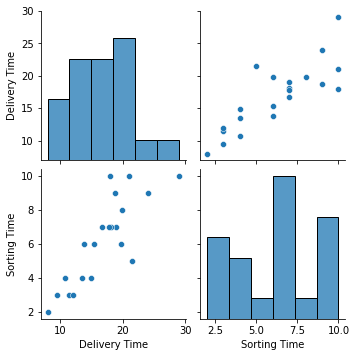

In [ ]:
#This helps to identify any corelation between the dimension of the data set
#here form the scatter plot we can infer that the is almost a 
#linear relationship between delivery time and sorting time 
#and only one dependent variable and 1 independent variable so we can apply simple linear regression model
sns.pairplot(dataset)

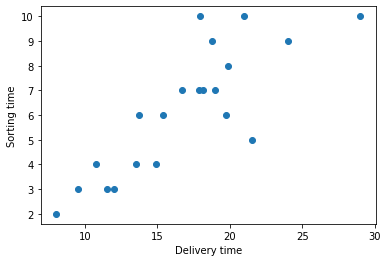

In [ ]:
plt.xlabel('Delivery time')
plt.ylabel('Sorting time')
plt.scatter(dataset['Delivery Time'],dataset['Sorting Time'])

In [ ]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Now Let the make model using this raw Data


In [ ]:
#setting independent variable and dependent variable  here we have to predict y based on y
X=dataset.iloc[:,1].values
y=dataset.iloc[:,0].values

In [ ]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature scaling not required as both are in same scale

In [ ]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [ ]:
y_train

array([19.83, 12.03,  8.  , 19.  , 17.83, 29.  , 19.75, 15.35, 13.75,
       18.75,  9.5 , 18.11, 24.  , 21.  , 14.88, 16.68])

In [ ]:
X_test

array([10,  3,  5,  4,  4])

In [ ]:
y_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

Fitting the model

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('y~X',data=dataset).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


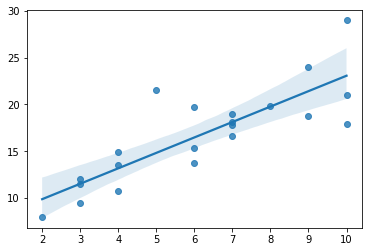

In [ ]:
import seaborn as sns
sns.regplot(x=X,y=y,data=dataset)

Here  we are generating the best fit line y=mX+c using this line we can make predictions

In [ ]:
#prediction for new data points
newdata=pd.Series([8])
data_pred=pd.DataFrame(newdata,columns=['X'])
model.predict(data_pred)[0]

19.774893146647024

In [ ]:
# display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        16:54:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

Here From the summary we observe that the r square and adjusted r square value and 68% and 66% respectively. which means our model isn't that good.we can improve the model by doing some transformations 

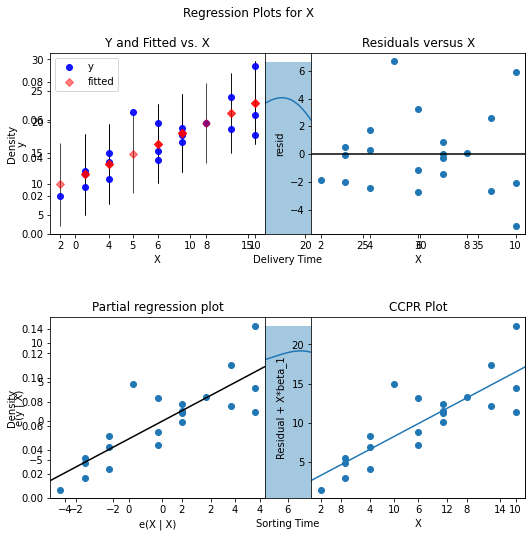

In [ ]:
# creating regression plots
import statsmodels.api as sm
fig = sm.graphics.plot_regress_exog(model,'X',fig=fig)
fig

Now we will transform the data and find a different model and compare the r square values and adjusted r values


**Logarthimic transformation**

In [ ]:
#logarithmic transformation
X1=np.log(dataset.iloc[:,1].values)   #
y1=np.log(dataset.iloc[:,0].values)

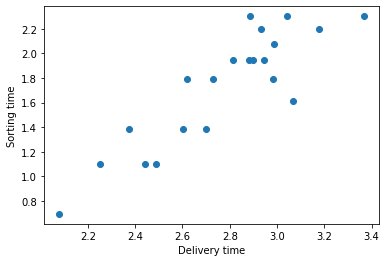

In [ ]:
plt.xlabel('Delivery time')
plt.ylabel('Sorting time')
plt.scatter(y1,X1)

In [ ]:
#Splitting the model
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=.2,random_state=0)

In [ ]:
X1_train

array([2.07944154, 1.09861229, 0.69314718, 1.94591015, 1.94591015,
       2.30258509, 1.79175947, 1.79175947, 1.79175947, 2.19722458,
       1.09861229, 1.94591015, 2.19722458, 2.30258509, 1.38629436,
       1.94591015])

In [ ]:
y1_train

array([2.98719594, 2.48740353, 2.07944154, 2.94443898, 2.88088243,
       3.36729583, 2.98315349, 2.73111547, 2.62103882, 2.93119375,
       2.2512918 , 2.89646427, 3.17805383, 3.04452244, 2.70001803,
       2.8142104 ])

Fitting the model

In [ ]:
model2=smf.ols('y1~X1',data=dataset).fit()

In [ ]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        17:03:24   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.0

Here we can observe that the r and ajusted r has improved which mean this is a better model than the above.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


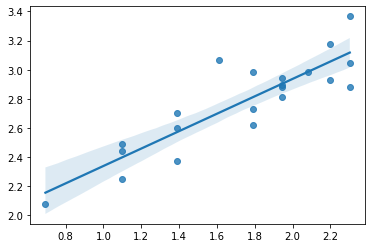

In [ ]:
sns.regplot(X1,y1)

**Square root transformation**

Let us now try with square root transoformation

In [ ]:
X2=np.sqrt(dataset.iloc[:,1].values)
y2=np.sqrt(dataset.iloc[:,0].values)

Scatter plot

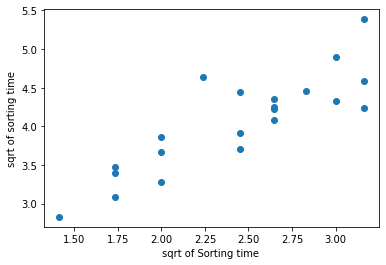

In [ ]:
plt.xlabel('sqrt of Sorting time ')
plt.ylabel('sqrt of sorting time')
plt.scatter(X2,y2)

splitting the data set into training and testing

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.2,random_state=0)

In [ ]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [ ]:
X2_test

array([3.16227766, 1.73205081, 2.23606798, 2.        , 2.        ])

In [ ]:
y2_test

array([4.23083916, 3.39116499, 4.63680925, 3.67423461, 3.27871926])

In [ ]:
y2_test

array([4.23083916, 3.39116499, 4.63680925, 3.67423461, 3.27871926])

In [ ]:
#fitting the model
model3=smf.ols('y2~X2',data=dataset).fit()

In [ ]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           8.48e-07
Time:                        17:19:03   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


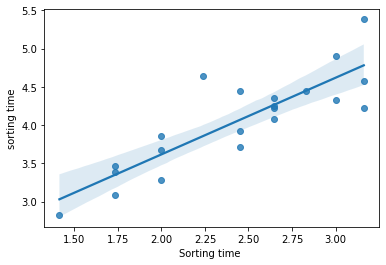

In [ ]:
#regression plot
plt.xlabel('Sorting time ')
plt.ylabel('sorting time')
sns.regplot(X2,y2)

Here we have r square and adjusted r square values less than the above case so we prefer the log model over square root model

**Square transformation**

In [ ]:
X3=(dataset.iloc[:,1].values)**2
y3=(dataset.iloc[:,0].values)**2

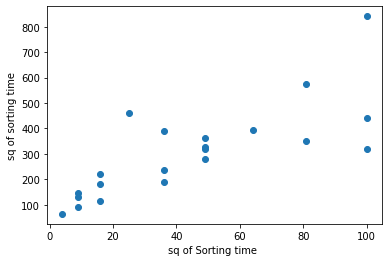

In [ ]:
plt.xlabel('sq of Sorting time ')
plt.ylabel('sq of sorting time')
plt.scatter(X3,y3)

Splitting of dataset

In [ ]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=.2,random_state=0)

In [ ]:
X3_train

array([ 64,   9,   4,  49,  49, 100,  36,  36,  36,  81,   9,  49,  81,
       100,  16,  49])

In [ ]:
X3_test

array([100,   9,  25,  16,  16])

In [ ]:
y3_test

array([320.41  , 132.25  , 462.25  , 182.25  , 115.5625])

In [ ]:
y3_train

array([393.2289, 144.7209,  64.    , 361.    , 317.9089, 841.    ,
       390.0625, 235.6225, 189.0625, 351.5625,  90.25  , 327.9721,
       576.    , 441.    , 221.4144, 278.2224])

In [ ]:
model4=smf.ols('y3~X3',data=dataset).fit()

In [ ]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           4.99e-05
Time:                        18:00:26   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548     45.231      2.524      0.0

Here for this model we are getting a realy low r square and aadjusted rsquare values which infer that this not a good model from scatter plot also we  have a idea about there were less linearity between the independent and dependent varibale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


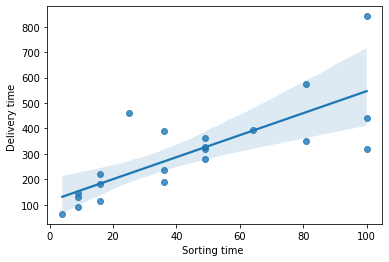

In [ ]:
#regression plot
plt.xlabel('Sorting time ')
plt.ylabel('Delivery time ')
sns.regplot(X3,y3)

**Inverse transormation**

In [ ]:
X4=1/(dataset.iloc[:,1].values)
y4=1/(dataset.iloc[:,0].values)

In [ ]:
X4

array([0.1       , 0.25      , 0.16666667, 0.11111111, 0.1       ,
       0.16666667, 0.14285714, 0.33333333, 0.1       , 0.11111111,
       0.125     , 0.25      , 0.14285714, 0.33333333, 0.33333333,
       0.25      , 0.16666667, 0.14285714, 0.5       , 0.14285714,
       0.2       ])

In [ ]:
y4

array([0.04761905, 0.07407407, 0.05063291, 0.04166667, 0.03448276,
       0.06514658, 0.05263158, 0.10526316, 0.05586592, 0.05333333,
       0.05042864, 0.09302326, 0.05995204, 0.08695652, 0.08312552,
       0.0672043 , 0.07272727, 0.05521811, 0.125     , 0.05608525,
       0.04651163])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


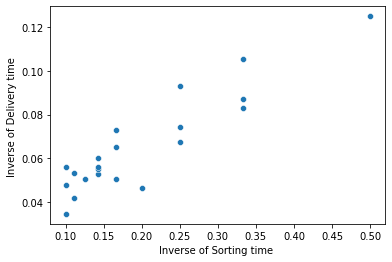

In [ ]:
plt.xlabel('Inverse of Sorting time ')
plt.ylabel('Inverse of Delivery time ')
sns.scatterplot(X4,y4)

Splitting the dataset into training and test

In [ ]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=.2,random_state=0)

In [ ]:
X4_train

array([0.125     , 0.33333333, 0.5       , 0.14285714, 0.14285714,
       0.1       , 0.16666667, 0.16666667, 0.16666667, 0.11111111,
       0.33333333, 0.14285714, 0.11111111, 0.1       , 0.25      ,
       0.14285714])

In [ ]:
X4_test

array([0.1       , 0.33333333, 0.2       , 0.25      , 0.25      ])

In [ ]:
y4_train

array([0.05042864, 0.08312552, 0.125     , 0.05263158, 0.05608525,
       0.03448276, 0.05063291, 0.06514658, 0.07272727, 0.05333333,
       0.10526316, 0.05521811, 0.04166667, 0.04761905, 0.0672043 ,
       0.05995204])

In [ ]:
y4_test

array([0.05586592, 0.08695652, 0.04651163, 0.07407407, 0.09302326])

Fitting the model

In [ ]:
model5=smf.ols('y4~X4',data=dataset).fit()

In [ ]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     96.47
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           7.02e-09
Time:                        18:10:00   Log-Likelihood:                 69.400
No. Observations:                  21   AIC:                            -134.8
Df Residuals:                      19   BIC:                            -132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0266      0.004      5.974      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


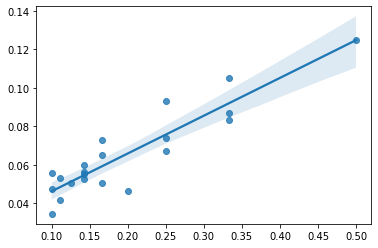

In [ ]:
#regression plot
sns.regplot(X4,y4)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:221: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 2, 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:231: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 2, 2)
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:238: MatplotlibDeprecationWarning

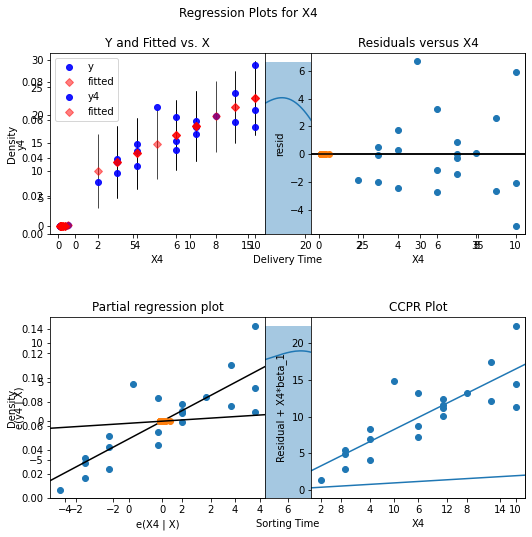

In [ ]:
fig5 = sm.graphics.plot_regress_exog(model5,'X4',fig=fig)
fig5

Inverse transfomation model is having the highest r square and adjusted r square value i.e:83%
and also the residual plot is also random so we can use this model

We can now predict the delivery time using this best fit line.y=mx+c
where the intercept is c=0.0266 and m= 0.1962